In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#logistic regression between BMI and Outcome
#Split the df in test and train
X_train, X_test, y_train, y_test = train_test_split(df[['BMI']],df.Outcome,train_size=0.8)

In [6]:
#Create and Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.2789459 , 0.39991623, 0.34266548, 0.38112762, 0.35864272,
       0.61779214, 0.19967754, 0.31178337, 0.41686998, 0.4147391 ,
       0.38735409, 0.3852744 , 0.64634226, 0.53227898, 0.35662744,
       0.29509917, 0.25827305, 0.56053548, 0.33480599, 0.29876179,
       0.2291945 , 0.5169659 , 0.60319161, 0.59476332, 0.19139909,
       0.25492634, 0.40836585, 0.37493999, 0.47313685, 0.42542386,
       0.29876179, 0.32703707, 0.69658307, 0.33480599, 0.53227898,
       0.40202327, 0.30430429, 0.26164826, 0.18869849, 0.48189117,
       0.27543079, 0.24022268, 0.14284772, 0.35864272, 0.20249605,
       0.59476332, 0.02949312, 0.21406607, 0.50819939, 0.46439901,
       0.33480599, 0.22610973, 0.2039164 , 0.18735919, 0.28426981,
       0.51477504, 0.17061125, 0.18077241, 0.40413394, 0.35061223,
       0.41048696, 0.40624816, 0.23545232, 0.21852698, 0.5016209 ,
       0.57560123, 0.4126114 , 0.33480599, 0.2125939 , 0.26164826,
       0.32703707, 0.31178337, 0.47532409, 0.39571332, 0.27194

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6623376623376623


In [10]:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

Precision: 0.56


In [11]:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

Recall: 0.2545454545454545


In [12]:
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.35


In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [14]:
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

AUC: 0.7057851239669422


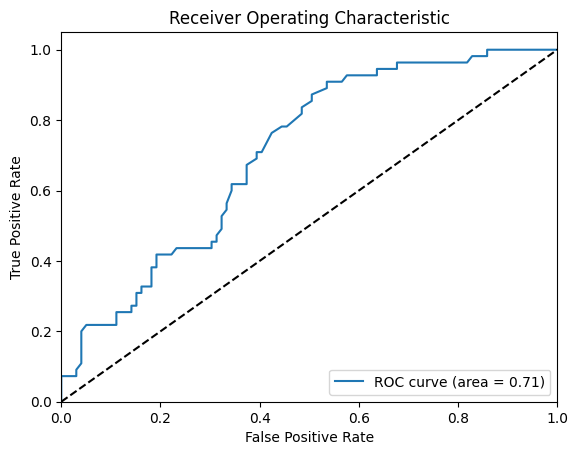

In [15]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
print ('Weight: ', model.coef_[0])
print('Bias:', model.intercept_)

Weight:  [0.08772293]
Bias: [-3.49366132]


In [17]:
X_range = np.linspace(X_train.min(), X_train.max(), 100)

In [18]:
y_prob = model.predict_proba(X_range.reshape(-1, 1))[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


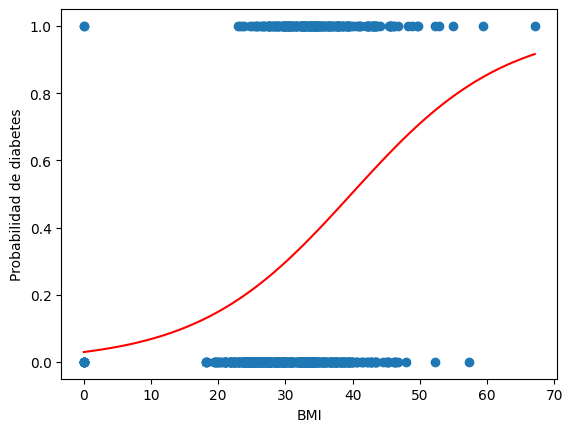

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_range, y_prob, color='red')
plt.xlabel('BMI')
plt.ylabel('Probabilidad de diabetes')
plt.show()

In [20]:
# Calculate accuracy on the test set
accuracy = model.score(X_test, y_test)
print(f'Accuracy on test set: {accuracy}')

Accuracy on test set: 0.6623376623376623


#Excercise 2

In [21]:
y_test1 = [0,0,0,0,0,1,1,1,1,1,2,2,2,2]
y_pred1 = [0,1,2,0,0,1,0,1,0,1,1,2,0,2]

In [22]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [23]:
#Confussion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_pred1)

array([[3, 1, 1],
       [2, 3, 0],
       [1, 1, 2]])

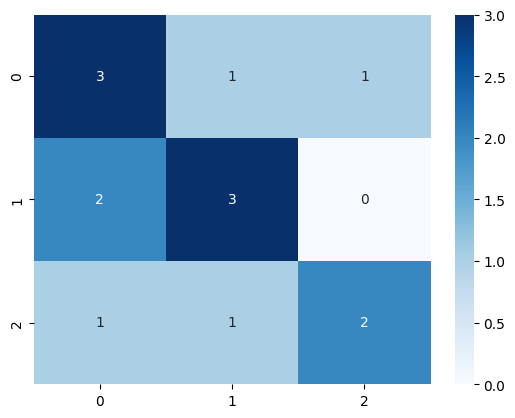

In [27]:
#Plot the matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True, fmt='d', cmap='Blues')
plt.show()

In [24]:
#Print the metrics report
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.60      0.60      0.60         5
           2       0.67      0.50      0.57         4

    accuracy                           0.57        14
   macro avg       0.59      0.57      0.57        14
weighted avg       0.58      0.57      0.57        14

